In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Importing dataset - the generated simulator data
data = pd.read_csv('./data/metrics.csv', delimiter=",")
data.head()

,Unnamed: 0,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Power,PowerConsumption,ContentType,O2,CO2,Time_Door_Open,Maintenance_Required,Defrost_Cycle
0,1.000000,2019-08-23 T02:51 Z,101,4.334781,4,18.068555,6.223367,1,5,2.0,9.650718,0,6
1,1.001001,2019-08-23 T02:51 Z,101,1.776005,4,2.277589,7.275207,1,18,0.0,7.281783,0,6
2,1.002002,2019-08-23 T02:51 Z,101,3.484405,4,15.773831,7.192769,1,19,3.0,7.705467,0,6
3,1.003003,2019-08-23 T02:51 Z,101,5.601419,4,9.641316,6.741234,1,10,2.0,7.665065,0,6
4,1.004004,2019-08-23 T02:51 Z,101,7.714694,4,17.128107,5.885542,1,14,3.0,9.053864,0,6


In [3]:
# Convert dataset into array for the independent variables (features)
X = np.asarray(data[['Temperature(celsius)','Target_Temperature(celsius)','Power','PowerConsumption','ContentType','O2','CO2','Time_Door_Open','Maintenance_Required','Defrost_Cycle']])
X[0:5]

array([[ 4.33478115,  4.        , 18.06855467,  6.22336687,  1.        ,
         5.        ,  2.        ,  9.65071775,  0.        ,  6.        ],
       [ 1.77600494,  4.        ,  2.27758874,  7.27520697,  1.        ,
        18.        ,  0.        ,  7.28178255,  0.        ,  6.        ],
       [ 3.48440489,  4.        , 15.77383088,  7.19276949,  1.        ,
        19.        ,  3.        ,  7.70546703,  0.        ,  6.        ],
       [ 5.60141941,  4.        ,  9.6413163 ,  6.74123406,  1.        ,
        10.        ,  2.        ,  7.66506473,  0.        ,  6.        ],
       [ 7.71469429,  4.        , 17.1281071 ,  5.88554201,  1.        ,
        14.        ,  3.        ,  9.05386352,  0.        ,  6.        ]])

In [4]:
# Convert dataset into array for the dependent (objective) variables
y = np.asarray(data['Maintenance_Required'])
#y = np.asarray(data['Maintainence_Required'])
y [0:5]

array([0, 0, 0, 0, 0])

In [5]:
# Normalize/standardize (mean = 0 and standard deviation = 1) 
# your features before applying machine learning techniques.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.46691248,  0.        ,  1.73812117, -0.99233634,  0.        ,
        -0.83809872, -0.21376349,  0.81007704, -0.69784586,  0.        ],
       [-0.80596337,  0.        , -0.43585854,  0.04075987,  0.        ,
         1.31448122, -1.00284175, -0.35527634, -0.69784586,  0.        ],
       [-0.57959167,  0.        ,  1.4222011 , -0.04020857,  0.        ,
         1.48006429,  0.18077564, -0.14685269, -0.69784586,  0.        ],
       [-0.29907645,  0.        ,  0.57792328, -0.4836976 ,  0.        ,
        -0.01018336, -0.21376349, -0.16672784, -0.69784586,  0.        ],
       [-0.01905676,  0.        ,  1.60864752, -1.32414113,  0.        ,
         0.65214893,  0.18077564,  0.51646576, -0.69784586,  0.        ]])

In [6]:
## split the dataset into train and test to estiamte model accuracy 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 10) (1600,)
Test set: (400, 10) (400,)


In [7]:
## As we are trying to acheive a binary classification, we use Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
## Predict using the trained LR model
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [9]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.88210835, 0.11789165],
       [0.90292227, 0.09707773],
       [0.08425439, 0.91574561],
       [0.904919  , 0.095081  ],
       [0.86490696, 0.13509304],
       [0.19201825, 0.80798175],
       [0.05690891, 0.94309109],
       [0.25125282, 0.74874718],
       [0.13363448, 0.86636552],
       [0.06280721, 0.93719279],
       [0.88253696, 0.11746304],
       [0.11017122, 0.88982878],
       [0.87904218, 0.12095782],
       [0.86193105, 0.13806895],
       [0.07826101, 0.92173899],
       [0.9092386 , 0.0907614 ],
       [0.90035473, 0.09964527],
       [0.10745955, 0.89254045],
       [0.86535593, 0.13464407],
       [0.86021741, 0.13978259],
       [0.07768946, 0.92231054],
       [0.2790901 , 0.7209099 ],
       [0.09563338, 0.90436662],
       [0.10939747, 0.89060253],
       [0.89458572, 0.10541428],
       [0.15454986, 0.84545014],
       [0.16042775, 0.83957225],
       [0.89504362, 0.10495638],
       [0.90522681, 0.09477319],
       [0.10005372, 0.89994628],
       [0.

In [11]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

1.0

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1,0]))

Confusion matrix, without normalization
[[131   0]
 [  0 269]]
[[131   0]
 [  0 269]]


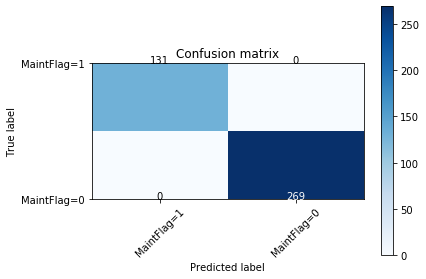

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MaintFlag=1','MaintFlag=0'],normalize= False,  title='Confusion matrix')

In [14]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       131

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [15]:

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)


0.12640847423478577

In [16]:
import pickle

#serializing our model to a file called model_logistic_regression.pkl
pickle.dump(LR, open("model_logistic_regression.pkl","wb"))